# Comparative Analysis of Machine Learning Algorithms for Fashion-MNIST Classification

#### Team : Avinash Pawar, Aoi Minamoto, Harshwardhan Patil

#### In this part we will test different classification methodologies and test them against different hyperparameters

First of all we will import the required libraries

In [ ]:
import sys
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# reading training and testing data
train_data = pd.read_csv('data/fashion-mnist_train.csv')
test_data = pd.read_csv('data/fashion-mnist_test.csv')

In [ ]:
# getting training and test labels 
train_labels = train_data['label']
test_labels = test_data['label']

In [ ]:
# dropping label column from the datasets
train_data.drop(columns=['label'], axis = 1, inplace = True)
test_data.drop(columns=['label'], axis = 1, inplace = True)

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

In [ ]:
split = StratifiedShuffleSplit(n_splits=1, test_size=10000, random_state=42)
# Split the dataset into training and validation data sets
for train_index, val_index in split.split(train_data, train_labels):
    train_dataset_ = train_data.loc[train_index]
    labels_train_dataset = train_labels.loc[train_index]
    
    validation_dataset_ = train_data.loc[val_index]
    labels_validation_dataset = train_labels.loc[val_index]

In [ ]:
train_dataset_.shape, labels_train_dataset.shape

In [ ]:
validation_dataset_.shape, labels_validation_dataset.shape

In [ ]:
test_data.shape, test_labels.shape

In [ ]:
# function to plot digits into an image format
def plot_data(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

In [ ]:
plt.figure(figsize=(9, 9))
for index_i, image_data in enumerate(train_dataset_.values[:100]):
    plt.subplot(10, 10, index_i + 1)
    plot_data(image_data)
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

# Implementing PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=0.96)
pca.fit(train_data)

In [ ]:
# Transform training and testing data using PCA
train_dataset = pd.DataFrame(pca.transform(train_dataset_))
validation_dataset = pd.DataFrame(pca.transform(validation_dataset_))

In [ ]:
train_dataset.shape, validation_dataset.shape

It looks like the features are reduced to 226. Let's use the next possible square value, i.e. 256.

In [ ]:
pca = PCA(n_components=256)
pca.fit(train_data)

In [ ]:
# Transform training and testing data using PCA
train_dataset = pd.DataFrame(pca.transform(train_dataset_))
validation_dataset = pd.DataFrame(pca.transform(validation_dataset_))

In [ ]:
# Transform training and testing data using PCA
train_data = pd.DataFrame(pca.transform(train_data))
test_data = pd.DataFrame(pca.transform(test_data))

In [ ]:
train_dataset.shape, validation_dataset.shape

In [ ]:
train_data.shape, test_data.shape

In [ ]:
train_dataset_recovered = pd.DataFrame(pca.inverse_transform(train_dataset))

In [ ]:
# function to plot digits into an image format
def plot_transformed_digit(image_data):
    image = image_data.reshape(28,28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

In [ ]:
plt.figure(figsize=(9, 9))
for index_i, image_data in enumerate(train_dataset_recovered.values[:100]):
    plt.subplot(10, 10, index_i + 1)
    plot_transformed_digit(image_data)
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

In [ ]:
train_data = pd.DataFrame(train_data.values[:1000])
test_data = pd.DataFrame(test_data.values[:1000])

train_labels = pd.DataFrame(train_labels.values[:1000])
test_labels = pd.DataFrame(test_labels.values[:1000])

# Multinomial Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [ ]:
# initializing parameter values
C_values = [1, 2, 3, 4, 5, 10]
penalty_values = ['l1', 'l2']
l_p, l_c = len(penalty_values), len(C_values)

In [ ]:
training_accuracy, validation_accuracy = np.zeros((l_p, l_c)) ,  np.zeros((l_p, l_c))
training_precision, validation_precision = np.zeros((l_p, l_c)) ,  np.zeros((l_p, l_c))
training_recall, validation_recall = np.zeros((l_p, l_c)) ,  np.zeros((l_p, l_c))
training_f1_score, validation_f1_score = np.zeros((l_p, l_c)) ,  np.zeros((l_p, l_c))

In [ ]:
best_accuracy = 0
best_parameters = {}

In [ ]:
for index_i, penalty in enumerate(penalty_values):
    for index_j, C in enumerate(C_values):     
        logistic_reg_model = LogisticRegression(multi_class='multinomial', solver='saga', C=C, penalty=penalty, n_jobs= -1)
        
        # Fit model on training data
        logistic_reg_model.fit(train_dataset, labels_train_dataset)
        
        # Predicting training labels based on trainig data
        training_labels_pred = logistic_reg_model.predict(train_dataset)
        
        # Predicting validation labels based on validation data
        validation_labels_pred = logistic_reg_model.predict(validation_dataset)
        
        # calculating scores on training dataset
        training_precision[index_i][index_j]=precision_score(labels_train_dataset, training_labels_pred, average='weighted')
        training_accuracy[index_i][index_j]=accuracy_score(labels_train_dataset, training_labels_pred)
        training_recall[index_i][index_j]=recall_score(labels_train_dataset, training_labels_pred, average='weighted')
        training_f1_score[index_i][index_j]=f1_score(labels_train_dataset, training_labels_pred, average='weighted')
        
        # calculating scores on validation dataset
        validation_precision[index_i][index_j]=precision_score(labels_validation_dataset, validation_labels_pred, average='weighted')
        validation_accuracy[index_i][index_j]=accuracy_score(labels_validation_dataset, validation_labels_pred)
        validation_recall[index_i][index_j]=recall_score(labels_validation_dataset, validation_labels_pred, average='weighted')
        validation_f1_score[index_i][index_j]=f1_score(labels_validation_dataset, validation_labels_pred, average='weighted')
        
        # Keep track of best hyperparameters and corresponding validation accuracy
        if validation_accuracy[index_i][index_j] > best_accuracy:
            best_accuracy = validation_accuracy[index_i][index_j]
            best_parameters = {'penalty': penalty, 'C': C}

#### Printing calculated scores on training and validation data

In [ ]:
print("For Logistic Regression Model:")
for index_i, penalty in enumerate(penalty_values):
    for index_j, C in enumerate(C_values):   
        print(f"\t  With penalty {penalty} and regularization parameter: {C}")
        print('\t\t  Accuracy Score: ', validation_accuracy[index_i][index_j])
        print('\t\t  Precision Score:', validation_precision[index_i][index_j])
        print('\t\t  Recall Score:', validation_recall[index_i][index_j])
        print('\t\t  F1 Score:', validation_f1_score[index_i][index_j])

#### Plotting validation curve with training accuracy and validation accuracy as function of hyperparameters

In [ ]:
fig, ax = plt.subplots()

x = C_values

train_acc_l1 = training_accuracy[0]
val_acc_l1 = validation_accuracy[0]

train_acc_l2 = training_accuracy[1]
val_acc_l2 = validation_accuracy[1]

plt.plot(C_values, train_acc_l1, marker='o', linestyle='--', color='r', linewidth=4, label='Training Accuracy with L1 penalty')
plt.plot(C_values, val_acc_l1, marker='o', linestyle='--', color='g', linewidth=4,  label='Validation Accuracy with L1 penalty')


plt.plot(C_values, train_acc_l2, marker='o', linestyle='-', color='c', linewidth=4, label='Training Accuracy with L2 penalty')
plt.plot(C_values, val_acc_l2, marker='o', linestyle='-', color='m', linewidth=4,  label='Validation Accuracy with L2 penalty')

plt.title('Training and validation accuracy a function of regularization parameters', size=10)
plt.xlabel('Regularization Parameters')
plt.ylabel('Accuracy' )
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
fig, ax = plt.subplots(2,2, figsize=(12, 10))

x = C_values

train_acc_l1 = training_accuracy[0]
val_acc_l1 = validation_accuracy[0]

train_acc_l2 = training_accuracy[1]
val_acc_l2 = validation_accuracy[1]

ax[0][0].plot(C_values, train_acc_l1, marker='.', linestyle='--', color='r')
ax[0][0].set_title('Training Accuracy with L1 penalty', size=10)
ax[0][0].set_xlabel('Regularization Parameters')
ax[0][0].set_ylabel('Accuracy')

ax[0][1].plot(C_values, train_acc_l2, marker='.', linestyle='-', color='g', label='Training Accuracy with L2 penalty')
ax[0][1].set_title('Training Accuracy with L2 penalty', size=10)
ax[0][1].set_xlabel('Regularization Parameters')
ax[0][1].set_ylabel('Accuracy')

ax[1][0].plot(C_values, val_acc_l1, marker='.', linestyle='--', color='r', label='Validation Accuracy with L1 penalty')
ax[1][0].set_title('Validation Accuracy with L1 penalty', size=10)
ax[1][0].set_xlabel('Regularization Parameters')
ax[1][0].set_ylabel('Accuracy')

ax[1][1].plot(C_values, val_acc_l2, marker='.', linestyle='-', color='g', label='Validation Accuracy with L2 penalty')
ax[1][1].set_title('Validation Accuracy with L2 penalty', size=10)
ax[1][1].set_xlabel('Regularization Parameters')
ax[1][1].set_ylabel('Accuracy')


plt.show()

### Now, we will test the model on the best hyperparameters we got from above processing.

In [ ]:
MLR_parameters = best_parameters

In [ ]:
print("Best hyperparameters:", best_parameters)
print("Model accuracy:", best_accuracy)

In [ ]:
# Creating model with best hyperparameters for executing it on test data
logistic_reg_model = LogisticRegression(multi_class='multinomial', solver='saga', C=MLR_parameters['C'], penalty=MLR_parameters['penalty'], n_jobs= -1)

In [ ]:
logistic_reg_model.fit(train_data, train_labels)

In [ ]:
# Predicting test data labels based on trained model
test_labels_pred = logistic_reg_model.predict(test_data)

In [ ]:
# plotting confusion matrix
plt.rc('font', size=10)  
cm = confusion_matrix(test_labels, test_labels_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [ ]:
print('Accuracy Score: ',precision_score(test_labels, test_labels_pred, average='weighted'))
print('Precision Score:',accuracy_score(test_labels, test_labels_pred))
print('Recall Score:',recall_score(test_labels, test_labels_pred, average='weighted'))
print('F1 Score:',f1_score(test_labels, test_labels_pred, average='weighted'))

# Support Vector Machines

## 1. Using Linear Kernal

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [ ]:
# initializing parameter values
C_values = [1, 2, 3, 4, 5, 10]
l_c = len(C_values)
l_p =1

In [ ]:
training_accuracy, validation_accuracy = np.zeros((l_p, l_c)) ,  np.zeros((l_p, l_c))
training_precision, validation_precision = np.zeros((l_p, l_c)) ,  np.zeros((l_p, l_c))
training_recall, validation_recall = np.zeros((l_p, l_c)) ,  np.zeros((l_p, l_c))
training_f1_score, validation_f1_score = np.zeros((l_p, l_c)) ,  np.zeros((l_p, l_c))

In [ ]:
best_accuracy = 0
best_parameters = {}

In [ ]:
index_i = 0
for index_j, C in enumerate(C_values):   
    # initialize the model
    svm_model = make_pipeline(StandardScaler(), SVC(kernel='linear', C=C, random_state=42,cache_size=8000))
    # Fit model on training data
    svm_model.fit(train_dataset, labels_train_dataset)

    # Predicting training labels based on trainig data
    training_labels_pred = svm_model.predict(train_dataset)

    # Predicting validation labels based on validation data
    validation_labels_pred = svm_model.predict(validation_dataset)
    
    # calculating scores on training dataset
    training_precision[index_i][index_j]=precision_score(labels_train_dataset, training_labels_pred, average='weighted')
    training_accuracy[index_i][index_j]=accuracy_score(labels_train_dataset, training_labels_pred)
    training_recall[index_i][index_j]=recall_score(labels_train_dataset, training_labels_pred, average='weighted')
    training_f1_score[index_i][index_j]=f1_score(labels_train_dataset, training_labels_pred, average='weighted')

    # calculating scores on validation dataset
    validation_precision[index_i][index_j]=precision_score(labels_validation_dataset, validation_labels_pred, average='weighted')
    validation_accuracy[index_i][index_j]=accuracy_score(labels_validation_dataset, validation_labels_pred)
    validation_recall[index_i][index_j]=recall_score(labels_validation_dataset, validation_labels_pred, average='weighted')
    validation_f1_score[index_i][index_j]=f1_score(labels_validation_dataset, validation_labels_pred, average='weighted')

    # Keep track of best hyperparameters and corresponding validation accuracy
    if validation_accuracy[index_i][index_j] > best_accuracy:
        best_accuracy = validation_accuracy[index_i][index_j]
        best_parameters = {'C': C}

In [ ]:
print("For SVM model with linear kernal:")
index_i=0
for index_j, C in enumerate(C_values):   
    print(f"\t  With regularization parameter: {C}")
    print('\t\t  Accuracy Score: ', validation_accuracy[index_i][index_j])
    print('\t\t  Precision Score:', validation_precision[index_i][index_j])
    print('\t\t  Recall Score:', validation_recall[index_i][index_j])
    print('\t\t  F1 Score:', validation_f1_score[index_i][index_j])

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 10))

train_acc = training_accuracy[0]
val_acc = validation_accuracy[0]

ax[0].plot(C_values, train_acc, marker='.', linestyle='--', color='r')
ax[0].set_title('Training Accuracy', size=10)
ax[0].set_xlabel('Regularization Parameters')
ax[0].set_ylabel('Accuracy')

ax[1].plot(C_values, val_acc, marker='.', linestyle='-', color='g')
ax[1].set_title('Validation Accuracy', size=10)
ax[1].set_xlabel('Regularization Parameters')
ax[1].set_ylabel('Accuracy')

plt.show()

### Now, we will test the model on the best hyperparameters we got from above processing.

In [ ]:
SVM_linear_parameters = best_parameters

In [ ]:
print("Best hyperparameters:", best_parameters)
print("Model accuracy:", best_accuracy)

In [ ]:
svm_model = make_pipeline(StandardScaler(), SVC(kernel='linear', C=SVM_linear_parameters['C'], random_state=42,cache_size=8000))

In [ ]:
svm_model.fit(train_data, train_labels)

In [ ]:
# Predicting test data labels based on trained model
test_labels_pred = svm_model.predict(test_data)

In [ ]:
# plotting confusion matrix
plt.rc('font', size=10)  
cm = confusion_matrix(test_labels, test_labels_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [ ]:
print('Accuracy Score: ',precision_score(test_labels, test_labels_pred, average='weighted'))
print('Precision Score:',accuracy_score(test_labels, test_labels_pred))
print('Recall Score:',recall_score(test_labels, test_labels_pred, average='weighted'))
print('F1 Score:',f1_score(test_labels, test_labels_pred, average='weighted'))

## 2. Using Polynomial Kernal

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [ ]:
# initializing parameter values
C_values = [1, 2, 3, 4, 5, 10]
coefficients  = [0, 1, 2]
l_coe, l_c = len(coefficients), len(C_values)

In [ ]:
training_accuracy, validation_accuracy = np.zeros((l_coe, l_c)) ,  np.zeros((l_coe, l_c))
training_precision, validation_precision = np.zeros((l_coe, l_c)) ,  np.zeros((l_coe, l_c))
training_recall, validation_recall = np.zeros((l_coe, l_c)) ,  np.zeros((l_coe, l_c))
training_f1_score, validation_f1_score = np.zeros((l_coe, l_c)) ,  np.zeros((l_coe, l_c))

In [ ]:
best_accuracy = 0
best_parameters = {}

In [ ]:
for index_i, coef in enumerate(coefficients):
    for index_j, C in enumerate(C_values):     
        #initialize the model
        svm_poly = make_pipeline(StandardScaler(), SVC(kernel='poly', degree=3, random_state=42,cache_size=8000))
        
        # set the parameters
        svm_poly.set_params(svc__C=C, svc__coef0=coef)
        
        # Fit model on training data
        svm_poly.fit(train_dataset, labels_train_dataset)
        
        # Predicting training labels based on trainig data
        training_labels_pred = svm_poly.predict(train_dataset)
        
        # Predicting validation labels based on validation data
        validation_labels_pred = svm_poly.predict(validation_dataset)
        
        # calculating scores on training dataset
        training_precision[index_i][index_j]=precision_score(labels_train_dataset, training_labels_pred, average='weighted')
        training_accuracy[index_i][index_j]=accuracy_score(labels_train_dataset, training_labels_pred)
        training_recall[index_i][index_j]=recall_score(labels_train_dataset, training_labels_pred, average='weighted')
        training_f1_score[index_i][index_j]=f1_score(labels_train_dataset, training_labels_pred, average='weighted')
        
        # calculating scores on validation dataset
        validation_precision[index_i][index_j]=precision_score(labels_validation_dataset, validation_labels_pred, average='weighted')
        validation_accuracy[index_i][index_j]=accuracy_score(labels_validation_dataset, validation_labels_pred)
        validation_recall[index_i][index_j]=recall_score(labels_validation_dataset, validation_labels_pred, average='weighted')
        validation_f1_score[index_i][index_j]=f1_score(labels_validation_dataset, validation_labels_pred, average='weighted')
        
        # Keep track of best hyperparameters and corresponding validation accuracy
        if validation_accuracy[index_i][index_j] > best_accuracy:
            best_accuracy = validation_accuracy[index_i][index_j]
            best_parameters = {'coefficients': coef, 'C': C}

In [ ]:
print("For SVM with polynomial kernal Model:")
for index_i, coef in enumerate(coefficients):
    for index_j, C in enumerate(C_values):   
        print(f"\t  With coefficient {coef} and regularization parameter: {C}")
        print('\t\t  Accuracy Score: ', validation_accuracy[index_i][index_j])
        print('\t\t  Precision Score:', validation_precision[index_i][index_j])
        print('\t\t  Recall Score:', validation_recall[index_i][index_j])
        print('\t\t  F1 Score:', validation_f1_score[index_i][index_j])

#### Plotting validation curve

In [ ]:
# Create a 2x3 grid of subplots
fig, axs = plt.subplots(nrows=len(coefficients), ncols=1, figsize=(12, 10))

# Flatten the axs array to simplify the loop
axs = axs.flatten()

# Iterate over the subplots and plot the data
# coefficient * c_values
for i, ax in enumerate(axs):
    ax.plot(C_values, training_accuracy[i], marker='.', linestyle='--', color='r', label = "Training Accuracy")
    ax.plot(C_values, validation_accuracy[i], marker='.', linestyle='-', color='g', label = "Validation Accuracy")
    # Set the title, xlabel, ylabel, and legend for each subplot
    ax.set_title(f'Training and validation accuracy for parameter coef0 ={coefficients[i]} as a function of regularization parameters')
    ax.set_xlabel('Regularization Parameters')
    ax.set_ylabel('Accuracy')
    ax.legend(loc='upper right')

# Adjust the layout of the subplots
fig.tight_layout()

# Show the plot
plt.show()

### Now, we will test the model on the best hyperparameters we got from above processing.

In [ ]:
SVM_poly_parameters = best_parameters

In [ ]:
print("Best hyperparameters:", best_parameters)
print("Model accuracy:", best_accuracy)

In [ ]:
# Creating model with best hyperparameters for executing it on test data
svm_poly = make_pipeline(StandardScaler(), SVC(kernel='poly', degree=3, random_state=42,cache_size=8000))
svm_poly.set_params(svc__C=SVM_poly_parameters['C'], svc__coef0=SVM_poly_parameters['coefficients'])

In [ ]:
svm_poly.fit(train_data, train_labels)

In [ ]:
# Predicting test data labels based on trained model
test_labels_pred = svm_poly.predict(test_data)

In [ ]:
# plotting confusion matrix
plt.rc('font', size=10)  
cm = confusion_matrix(test_labels, test_labels_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [ ]:
print('Accuracy Score: ',precision_score(test_labels, test_labels_pred, average='weighted'))
print('Precision Score:',accuracy_score(test_labels, test_labels_pred))
print('Recall Score:',recall_score(test_labels, test_labels_pred, average='weighted'))
print('F1 Score:',f1_score(test_labels, test_labels_pred, average='weighted'))

## 3. Using RBF Kernal

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [ ]:
# initializing parameter values
C_values = [1, 2, 3, 4, 5, 10]
gammas  = [0.1, 1, 10]
l_g, l_c = len(gammas), len(C_values)

In [ ]:
training_accuracy, validation_accuracy = np.zeros((l_g, l_c)) ,  np.zeros((l_g, l_c))
training_precision, validation_precision = np.zeros((l_g, l_c)) ,  np.zeros((l_g, l_c))
training_recall, validation_recall = np.zeros((l_g, l_c)) ,  np.zeros((l_g, l_c))
training_f1_score, validation_f1_score = np.zeros((l_g, l_c)) ,  np.zeros((l_g, l_c))

In [ ]:
best_accuracy = 0
best_parameters = {}

In [ ]:
for index_i, gamma in enumerate(gammas):
    for index_j, C in enumerate(C_values):     
        
        svm_rbf = SVC(kernel='rbf', C=C, gamma=gamma,cache_size=8000)
        
        # Fit model on training data
        svm_rbf.fit(train_dataset, labels_train_dataset)
        
        # Predicting training labels based on trainig data
        training_labels_pred = svm_rbf.predict(train_dataset)
        
        # Predicting validation labels based on validation data
        validation_labels_pred = svm_rbf.predict(validation_dataset)
        
        # calculating scores on training dataset
        training_precision[index_i][index_j]=precision_score(labels_train_dataset, training_labels_pred, average='weighted')
        training_accuracy[index_i][index_j]=accuracy_score(labels_train_dataset, training_labels_pred)
        training_recall[index_i][index_j]=recall_score(labels_train_dataset, training_labels_pred, average='weighted')
        training_f1_score[index_i][index_j]=f1_score(labels_train_dataset, training_labels_pred, average='weighted')
        
        # calculating scores on validation dataset
        validation_precision[index_i][index_j]=precision_score(labels_validation_dataset, validation_labels_pred, average='weighted')
        validation_accuracy[index_i][index_j]=accuracy_score(labels_validation_dataset, validation_labels_pred)
        validation_recall[index_i][index_j]=recall_score(labels_validation_dataset, validation_labels_pred, average='weighted')
        validation_f1_score[index_i][index_j]=f1_score(labels_validation_dataset, validation_labels_pred, average='weighted')
        
        # Keep track of best hyperparameters and corresponding validation accuracy
        if validation_accuracy[index_i][index_j] > best_accuracy:
            best_accuracy = validation_accuracy[index_i][index_j]
            best_parameters = {'gamma': gamma, 'C': C}

In [ ]:
print("For SVM with RBF kernal Model:")
for index_i, gamma in enumerate(gammas):
    for index_j, C in enumerate(C_values): 
        print(f"\t  With Gamma: {gamma} and regularization parameter: {C}")
        print('\t\t  Accuracy Score: ', validation_accuracy[index_i][index_j])
        print('\t\t  Precision Score:', validation_precision[index_i][index_j])
        print('\t\t  Recall Score:', validation_recall[index_i][index_j])
        print('\t\t  F1 Score:', validation_f1_score[index_i][index_j])

#### Plotting validation curve

In [ ]:
C_values = [1, 2, 3, 4, 5, 10]
gammas  = [1, 2, 5, 10]

# Create a 2x3 grid of subplots
fig, axs = plt.subplots(nrows=len(gammas), ncols=1, figsize=(12, 10))

# Flatten the axs array to simplify the loop
axs = axs.flatten()

# Iterate over the subplots and plot the data
# gammas * c_values
for i, ax in enumerate(axs):
    ax.plot(C_values, training_accuracy[i], marker='.', linestyle='--', color='r', label = "Training Accuracy")
    ax.plot(C_values, validation_accuracy[i], marker='.', linestyle='-', color='g', label = "Validation Accuracy")
    # Set the title, xlabel, ylabel, and legend for each subplot
    ax.set_title(f'Training and validation accuracy for parameter Gamma ={gammas[i]} as a function of regularization parameters')
    ax.set_xlabel('Regularization Parameters')
    ax.set_ylabel('Accuracy')
    ax.legend(loc='upper right')

# Adjust the layout of the subplots
fig.tight_layout()

# Show the plot
plt.show()

### Now, we will test the model on the best hyperparameters we got from above processing.

In [ ]:
SVM_rbf_parameters = best_parameters

In [ ]:
print("Best hyperparameters:", best_parameters)
print("Model accuracy:", best_accuracy)

In [ ]:
# Creating model with best hyperparameters for executing it on test data
svm_rbf = SVC(kernel='rbf', C=SVM_rbf_parameters['C'], gamma=SVM_rbf_parameters['gamma'],cache_size=8000)

In [ ]:
svm_rbf.fit(train_data, train_labels)

In [ ]:
# Predicting test data labels based on trained model
test_labels_pred = svm_rbf.predict(test_data)

In [ ]:
# plotting confusion matrix
plt.rc('font', size=10)  
cm = confusion_matrix(test_labels, test_labels_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [ ]:
print('Accuracy Score: ',precision_score(test_labels, test_labels_pred, average='weighted'))
print('Precision Score:',accuracy_score(test_labels, test_labels_pred))
print('Recall Score:',recall_score(test_labels, test_labels_pred, average='weighted'))
print('F1 Score:',f1_score(test_labels, test_labels_pred, average='weighted'))

# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [ ]:
# initializing parameter values
estimators = [50, 100, 200, 500, 1000]
depths  = [5, 10, 50]
l_e, l_d = len(estimators), len(depths)

In [ ]:
training_accuracy, validation_accuracy = np.zeros((l_e, l_d)) ,  np.zeros((l_e, l_d))
training_precision, validation_precision = np.zeros((l_e, l_d)) ,  np.zeros((l_e, l_d))
training_recall, validation_recall = np.zeros((l_e, l_d)) ,  np.zeros((l_e, l_d))
training_f1_score, validation_f1_score = np.zeros((l_e, l_d)) ,  np.zeros((l_e, l_d))

In [ ]:
best_accuracy = 0
best_parameters = {}

In [ ]:
for index_i, estimator in enumerate(estimators):
    for index_j, depth in enumerate(depths):    
        
        rfc = RandomForestClassifier(n_estimators=estimator, max_depth=depth, n_jobs= -1)
        # Fit model on training data
        rfc.fit(train_dataset, labels_train_dataset)
        
        # Predicting training labels based on trainig data
        training_labels_pred = rfc.predict(train_dataset)
        
        # Predicting validation labels based on validation data
        validation_labels_pred = rfc.predict(validation_dataset)
        
        # calculating scores on training dataset
        training_precision[index_i][index_j]=precision_score(labels_train_dataset, training_labels_pred, average='weighted')
        training_accuracy[index_i][index_j]=accuracy_score(labels_train_dataset, training_labels_pred)
        training_recall[index_i][index_j]=recall_score(labels_train_dataset, training_labels_pred, average='weighted')
        training_f1_score[index_i][index_j]=f1_score(labels_train_dataset, training_labels_pred, average='weighted')
        
        # calculating scores on validation dataset
        validation_precision[index_i][index_j]=precision_score(labels_validation_dataset, validation_labels_pred, average='weighted')
        validation_accuracy[index_i][index_j]=accuracy_score(labels_validation_dataset, validation_labels_pred)
        validation_recall[index_i][index_j]=recall_score(labels_validation_dataset, validation_labels_pred, average='weighted')
        validation_f1_score[index_i][index_j]=f1_score(labels_validation_dataset, validation_labels_pred, average='weighted')
        
        # Keep track of best hyperparameters and corresponding validation accuracy
        if validation_accuracy[index_i][index_j] > best_accuracy:
            best_accuracy = validation_accuracy[index_i][index_j]
            best_parameters = {'n_estimators': estimator, 'max_depth': depth}

In [ ]:
print("For Random Forest Classifier Model:")
for index_i, estimator in enumerate(estimators):
    for index_j, depth in enumerate(depths):  
        print(f"\t  With Estimators: {estimator} and Depth: {depth}")
        print('\t\t  Accuracy Score: ', validation_accuracy[index_i][index_j])
        print('\t\t  Precision Score:', validation_precision[index_i][index_j])
        print('\t\t  Recall Score:', validation_recall[index_i][index_j])
        print('\t\t  F1 Score:', validation_f1_score[index_i][index_j])

#### Plotting validation curve

In [ ]:
estimators = [50, 100, 200, 500, 1000]
depths  = [5, 10, 50]
# Create a 2x3 grid of subplots
fig, axs = plt.subplots(nrows=len(depths), ncols=1, figsize=(12, 10))

# Flatten the axs array to simplify the loop
axs = axs.flatten()

# Iterate over the subplots and plot the data
# coefficient * c_values
for i, ax in enumerate(axs):
    ax.plot(np.log(estimators), training_accuracy[i], marker='.', linestyle='--', color='r', label = "Training Accuracy")
    ax.plot(np.log(estimators), validation_accuracy[i], marker='.', linestyle='-', color='g', label = "Validation Accuracy")
    # Set the title, xlabel, ylabel, and legend for each subplot
    ax.set_title(f'Training and validation accuracy for parameter depth ={depths[i]} as a function of log estimators')
    ax.set_xlabel('Regularization Parameters')
    ax.set_ylabel('Accuracy')
    ax.legend(loc='upper right')

# Adjust the layout of the subplots
fig.tight_layout()

# Show the plot
plt.show()

### Now, we will test the model on the best hyperparameters we got from above processing.

In [ ]:
rfc_parameters = best_parameters

In [ ]:
print("Best hyperparameters:", best_parameters)
print("Model accuracy:", best_accuracy)

In [ ]:
# Creating model with best hyperparameters for executing it on test data
rfc = RandomForestClassifier(n_estimators=rfc_parameters['n_estimators'], max_depth=rfc_parameters['max_depth'], n_jobs= -1)

In [ ]:
rfc.fit(train_data, train_labels)

In [ ]:
# Predicting test data labels based on trained model
test_labels_pred = rfc.predict(test_data)

In [ ]:
# plotting confusion matrix
plt.rc('font', size=10)  
cm = confusion_matrix(test_labels, test_labels_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [ ]:
print('Accuracy Score: ',precision_score(test_labels, test_labels_pred, average='weighted'))
print('Precision Score:',accuracy_score(test_labels, test_labels_pred))
print('Recall Score:',recall_score(test_labels, test_labels_pred, average='weighted'))
print('F1 Score:',f1_score(test_labels, test_labels_pred, average='weighted'))

#### Feature Importance

In [76]:
rfc_parameters

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [77]:
rfc_model = RandomForestClassifier(n_estimators=rfc_parameters['n_estimators'], 
                             max_depth=rfc_parameters['max_depth'], 
                             min_samples_leaf = rfc_parameters['min_samples_leaf'], 
                             min_samples_split = rfc_parameters['min_samples_split'], 
                             n_jobs= -1)

In [78]:
rfc_model.fit(train_data, train_labels)

RandomForestClassifier(n_estimators=200, n_jobs=-1)

In [79]:
important_features = rfc_model.feature_importances_

# Get the indices of the top 10 features
feature_indices = np.argsort(important_features)[::-1][:10]

# Print the top 10 features and their importances
print("Top 10 features and their importances for Hard Voting Classifier:")
for index_i in feature_indices:
    print("{}: {:.4f}".format(index_i, important_features[index_i]))

Top 10 features and their importances for Hard Voting Classifier:
1: 0.0738
0: 0.0580
2: 0.0568
5: 0.0485
4: 0.0401
7: 0.0338
6: 0.0322
3: 0.0320
8: 0.0227
9: 0.0213


we will plot the heatmap for viewing important pixels in the image, which potentially can be used for training the data more effectively.

<AxesSubplot:>

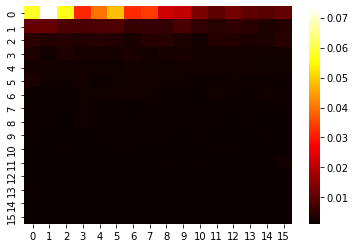

In [80]:
sns.heatmap(rfc_model.feature_importances_.reshape(16,16), cmap = 'hot')

We can have a look at the transformed data to get better understanding about what the plot is suggesting

# Ensamble learning

In [ ]:
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [ ]:
# Create a Logistic Regression Classifier object
logistic_reg_model = LogisticRegression(multi_class='multinomial', solver='saga', C=MLR_parameters['C'], penalty=MLR_parameters['penalty'], n_jobs= -1)

# Create a SVM Classifier object
svm_rbf = SVC(kernel='rbf', C=SVM_rbf_parameters['C'], gamma=SVM_rbf_parameters['gamma'],cache_size=8000)

# Create a Random Forest Classifier object
rfc = RandomForestClassifier(n_estimators=rfc_parameters['n_estimators'], max_depth=rfc_parameters['max_depth'], n_jobs= -1)

### Hard Voting

In [ ]:
# Create an ensemble of the three classifiers
voting_classifier = VotingClassifier(estimators=[('logistic_regression', logistic_reg_model), 
                                                 ('svm', svm_rbf), ('randomforest', rfc)], voting='hard')

In [ ]:
voting_classifier.fit(train_data, train_labels)

In [ ]:
test_labels_pred = voting_classifier.predict(test_data)

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

plt.rc('font', size=10)  # extra code – make the text smaller
ConfusionMatrixDisplay.from_predictions(test_labels, test_labels_pred)
plt.show()

In [ ]:
print('Accuracy Score: ',precision_score(test_labels, test_labels_pred, average='weighted'))
print('Precision Score:',accuracy_score(test_labels, test_labels_pred))
print('Recall Score:',recall_score(test_labels, test_labels_pred, average='weighted'))
print('F1 Score:',f1_score(test_labels, test_labels_pred, average='weighted'))

#### Feature Importance

In [ ]:
important_features = rf.feature_importances_

# Get the indices of the top 10 features
feature_indices = np.argsort(important_features)[::-1][:10]

# Print the top 10 features and their importances
print("Top 10 features and their importances for Hard Voting Classifier:")
for index_i in feature_indices:
    print("{}: {:.4f}".format(index_i, important_features[i]))

### Soft Voting

In [ ]:
# Create an ensemble of the three classifiers
voting_classifier = VotingClassifier(estimators=[('logistic_regression', logistic_reg_model), 
                                                 ('svm', svm_rbf), ('randomforest', rfc)], voting='soft')

In [ ]:
voting_classifier.fit(train_data, train_labels)

In [ ]:
test_labels_pred = voting_classifier.predict(test_data)

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

plt.rc('font', size=10)  # extra code – make the text smaller
ConfusionMatrixDisplay.from_predictions(test_labels, test_labels_pred)
plt.show()

In [ ]:
print('Accuracy Score: ',precision_score(test_labels, test_labels_pred, average='weighted'))
print('Precision Score:',accuracy_score(test_labels, test_labels_pred))
print('Recall Score:',recall_score(test_labels, test_labels_pred, average='weighted'))
print('F1 Score:',f1_score(test_labels, test_labels_pred, average='weighted'))

#### Feature Importance

In [ ]:
important_features = rf.feature_importances_

# Get the indices of the top 10 features
feature_indices = np.argsort(important_features)[::-1][:10]

# Print the top 10 features and their importances
print("Top 10 features and their importances for Soft Voting Classifier:")
for index_i in feature_indices:
    print("{}: {:.4f}".format(index_i, important_features[i]))